In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay

In [2]:
## Loading dataset
df = pd.read_csv("name_gender_dataset.csv")

In [3]:
## checking Dataset
df.head(10)
#print(df_names[df_names['Count'] == 10])

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567
5,Mary,F,4169663,0.011411
6,David,M,3787547,0.010366
7,Joseph,M,2695970,0.007378
8,Richard,M,2638187,0.007220
9,Charles,M,2433540,0.006660


In [4]:
# To drop the columns where the count for male or female is smaller 

# Step 1: Group by Name and then keep the row with the highest Count within each group
def keep_max_count(group):
    return group.loc[group['Count'].idxmax()]

# Apply the function to each group
df_names = df.groupby('Name').apply(keep_max_count).reset_index(drop=True)

df_names.head(10)

,Name,Gender,Count,Probability
0,A,F,2,5.473480e-09
1,A'Aff,F,1,2.736740e-09
2,A'Aron,M,1,2.736740e-09
3,A'Dele,F,1,2.736740e-09
4,A'Isha,F,1,2.736740e-09
5,A'Ishah,F,1,2.736740e-09
6,A'Jana,F,1,2.736740e-09
7,A'Janae,F,1,2.736740e-09
8,A'Lmos,M,1,2.736740e-09
9,A'Nette,F,1,2.736740e-09


In [5]:
n_rows = df_names[df_names['Name'] == 'James']
n_rows

,Name,Gender,Count,Probability
52308,James,M,5304407,0.014517


In [6]:
name_row = df[df['Name'] == 'James']
name_row

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1615,James,F,23963,0.000066


In [7]:
## Checking dimensions of the dataframe
print(df_names.shape)

(133910, 4)


In [8]:
df_names['length'] = df_names['Name'].str.len()
df_names.sort_values('length', ascending=True, inplace=True)
df_names.head(100)

,Name,Gender,Count,Probability,length
0,A,F,2,5.473480e-09,1
94371,P,M,6,1.642040e-08,1
13782,B,M,3,8.210220e-09,1
97891,R,F,1,2.736740e-09,1
47969,I,M,3,8.210220e-09,1
...,...,...,...,...,...
125392,Va,M,69,1.888350e-07,2
57393,Jl,M,37,1.012590e-07,2
32930,Dj,M,764,2.090870e-06,2
57375,Jj,M,544,1.488790e-06,2


In [9]:
df_names = df_names.sort_values(by='length', ascending=False)
df_names


,Name,Gender,Count,Probability,length
20117,Carmelo-Antonio-Francesco,M,1,2.736740e-09,25
105736,Sandrine-Marie-Madeleine,F,1,2.736740e-09,24
89351,Nathan-Conway-Barrington,M,1,2.736740e-09,24
80486,Maria-Mandy-Antoninetta,F,1,2.736740e-09,23
84178,Merlin-Siegfried-Daniel,M,1,2.736740e-09,23
...,...,...,...,...,...
18874,C,M,1,2.736740e-09,1
41501,G,M,2,5.473480e-09,1
92784,O,F,1,2.736740e-09,1
104207,S,M,2,5.473480e-09,1


In [10]:
## We founnd probability is useless here so we drop the column
df_names = df_names.drop('Probability', axis=1)
df_names

,Name,Gender,Count,length
20117,Carmelo-Antonio-Francesco,M,1,25
105736,Sandrine-Marie-Madeleine,F,1,24
89351,Nathan-Conway-Barrington,M,1,24
80486,Maria-Mandy-Antoninetta,F,1,23
84178,Merlin-Siegfried-Daniel,M,1,23
...,...,...,...,...
18874,C,M,1,1
41501,G,M,2,1
92784,O,F,1,1
104207,S,M,2,1


In [11]:
## Changing the gender to numerical classifiers

df_names['Gender'] = df_names['Gender'].replace({'M': 1, 'F': 0})
df_names.head(100)

,Name,Gender,Count,length
20117,Carmelo-Antonio-Francesco,1,1,25
105736,Sandrine-Marie-Madeleine,0,1,24
89351,Nathan-Conway-Barrington,1,1,24
80486,Maria-Mandy-Antoninetta,0,1,23
84178,Merlin-Siegfried-Daniel,1,1,23
...,...,...,...,...
79365,Malgosia-Dominique,0,1,18
118240,Tarlitah-Katreece,0,1,17
25195,Constantina-Maria,0,1,17
9086,Antonia-Elizabeth,0,1,17


In [12]:
## Remove names with one letter and bigger than 15
df_names.drop(df_names[df_names['length'] > 15].index, inplace = True)
df_names.drop(df_names[df_names['length'] == 1].index, inplace = True)
df_names

,Name,Gender,Count,length
106986,Seanchristopher,1,10,15
58514,Jordanchristoph,1,5,15
41559,Gabrielalexande,1,6,15
105285,Samantha-Evonne,0,1,15
95163,Patrick-Rajakna,1,1,15
...,...,...,...,...
103476,Ru,0,1,2
123855,Tu,1,357,2
133678,Zy,1,48,2
44862,Ha,0,468,2


In [13]:
# Group by all columns and calculate size (count) for each group
df_names.drop(df_names[df_names['Count'] <= 5].index, inplace = True)
df_names.sort_values(by="length", ascending=True).head(10)



,Name,Gender,Count,length
2528,Ah,1,75,2
93096,Ok,0,35,2
113312,So,0,56,2
29241,De,1,705,2
77079,Ly,0,304,2
37632,En,1,17,2
34190,Du,1,24,2
112989,Sj,1,11,2
47973,Ia,0,164,2
133060,Zi,0,98,2


In [14]:
df_names = df_names[~df_names['Name'].str.contains('-')]
df_names = df_names[~df_names['Name'].str.contains('@')]

## Check for special characters
import re
special_char_pattern = re.compile(r'[^a-zA-Z0-9 ]')
df_names['Has_Special_Char'] = df_names['Name'].str.contains(special_char_pattern)
df_clean = df_names[~df_names['Has_Special_Char']]
# df_cleaned = df_names[~df_names['Has_Special_Char']].drop(columns=['Has_Special_Char'])

df_clean['Has_Special_Char'] = df_clean['Name'].str.contains(special_char_pattern)
df_clean = df_clean.drop(columns='Has_Special_Char', axis =1)
df_clean


C:\Users\dency\AppData\Local\Temp\ipykernel_28096\1224574629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Has_Special_Char'] = df_clean['Name'].str.contains(special_char_pattern)


,Name,Gender,Count,length
106986,Seanchristopher,1,10,15
41559,Gabrielalexande,1,6,15
104002,Ryanchristopher,1,45,15
23690,Christiananthon,1,12,15
82341,Matthewalexande,1,11,15
...,...,...,...,...
97894,Ra,1,113,2
123855,Tu,1,357,2
133678,Zy,1,48,2
44862,Ha,0,468,2


In [15]:
## Null check
nan_check = df_clean.isna().sum()
nan_check

Name      0
Gender    0
Count     0
length    0
dtype: int64

In [16]:
## names to lowercase to dont have problems with letters 
df_clean['Name'] = df_clean['Name'].apply(lambda x: x.upper() if isinstance(x, str) else x)
df_clean.head(15)

,Name,Gender,Count,length
106986,SEANCHRISTOPHER,1,10,15
41559,GABRIELALEXANDE,1,6,15
104002,RYANCHRISTOPHER,1,45,15
23690,CHRISTIANANTHON,1,12,15
82341,MATTHEWALEXANDE,1,11,15
57955,JOHNCHRISTOPHER,1,132,15
23699,CHRISTIANMICHAE,1,11,15
23697,CHRISTIANJOSEPH,1,22,15
11422,ASHLEYELIZABETH,0,8,15
23796,CHRISTOPHERANTH,1,6,15


In [17]:
# df_names['l3_letters'] = df_names['Name'].str[-3:]
# df_names['l2_letters'] = df_names['Name'].str[-2:]
# df_names['l1_letters'] = df_names['Name'].str[-1:]
df_clean.sort_values(by="length", ascending=False).head(20)

## print(df_names.shape)

,Name,Gender,Count,length
106986,SEANCHRISTOPHER,1,10,15
23800,CHRISTOPHERJOHN,1,118,15
41559,GABRIELALEXANDE,1,6,15
80521,MARIADELROSARIO,0,22,15
80518,MARIADELOSANGEL,0,36,15
81014,MARKCHRISTOPHER,1,6,15
41120,FRANCISCOJAVIER,1,130,15
23691,CHRISTIANDANIEL,1,7,15
23806,CHRISTOPHERRYAN,1,11,15
23804,CHRISTOPHERMICH,1,59,15


In [18]:
# Function to convert string to ASCII values and pad with zeros if length is less than 5
def string_to_ascii_padded(s):
    ascii_values = [(ord(c)-64) for c in s]
    while len(ascii_values) < 15:
        ascii_values.append(0)
    return ascii_values

# Apply the function to the 'names' column
df_clean['encoded_names'] = df_clean['Name'].apply(string_to_ascii_padded)
## df_names = df_names.drop('names_ascii', axis=1)

df_clean['name_ascii'] = [','.join(map(str, l)) for l in df_clean['encoded_names']]

df_clean = df_clean.drop('encoded_names', axis=1)

df_clean.sort_index()

,Name,Gender,Count,length,name_ascii
13,AABAN,1,115,5,"1,1,2,1,14,0,0,0,0,0,0,0,0,0,0"
14,AABHA,0,35,5,"1,1,2,8,1,0,0,0,0,0,0,0,0,0,0"
15,AABID,1,20,5,"1,1,2,9,4,0,0,0,0,0,0,0,0,0,0"
18,AABIR,1,10,5,"1,1,2,9,18,0,0,0,0,0,0,0,0,0,0"
21,AABRIELLA,0,38,9,"1,1,2,18,9,5,12,12,1,0,0,0,0,0,0"
...,...,...,...,...,...
133904,ZYVA,0,23,4,"26,25,22,1,0,0,0,0,0,0,0,0,0,0,0"
133906,ZYVON,1,7,5,"26,25,22,15,14,0,0,0,0,0,0,0,0,0,0"
133907,ZYYANNA,0,6,7,"26,25,25,1,14,14,1,0,0,0,0,0,0,0,0"
133908,ZYYON,1,6,5,"26,25,25,15,14,0,0,0,0,0,0,0,0,0,0"


In [19]:
# Split the 'encoded_names' column into separate columns
df_pre = df_clean.drop(["Name", "Count", "length"], axis=1)
df_pre


,Gender,name_ascii
106986,1,"19,5,1,14,3,8,18,9,19,20,15,16,8,5,18"
41559,1,"7,1,2,18,9,5,12,1,12,5,24,1,14,4,5"
104002,1,"18,25,1,14,3,8,18,9,19,20,15,16,8,5,18"
23690,1,"3,8,18,9,19,20,9,1,14,1,14,20,8,15,14"
82341,1,"13,1,20,20,8,5,23,1,12,5,24,1,14,4,5"
...,...,...
97894,1,"18,1,0,0,0,0,0,0,0,0,0,0,0,0,0"
123855,1,"20,21,0,0,0,0,0,0,0,0,0,0,0,0,0"
133678,1,"26,25,0,0,0,0,0,0,0,0,0,0,0,0,0"
44862,0,"8,1,0,0,0,0,0,0,0,0,0,0,0,0,0"


In [20]:
name_ascii_split = df_clean['name_ascii'].str.split(',', expand=True)

# Concatenate the new DataFrame with the 'Gender' column
result_df= pd.concat([df_clean['Gender'], name_ascii_split], axis=1)

result_df = result_df.astype(int)
# result_df = result_df[["Gender","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14"]]

cols = result_df.columns.tolist()
cols.append(cols.pop(cols.index('Gender')))
df_pro = result_df[cols]

df_pro

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Gender
106986,19,5,1,14,3,8,18,9,19,20,15,16,8,5,18,1
41559,7,1,2,18,9,5,12,1,12,5,24,1,14,4,5,1
104002,18,25,1,14,3,8,18,9,19,20,15,16,8,5,18,1
23690,3,8,18,9,19,20,9,1,14,1,14,20,8,15,14,1
82341,13,1,20,20,8,5,23,1,12,5,24,1,14,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
123855,20,21,0,0,0,0,0,0,0,0,0,0,0,0,0,1
133678,26,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1
44862,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
## Define X and Y variables
X_values = df_pro.iloc[:, :-1]
Y_values = df_pro.iloc[:, -1]


# Neural Network

## Using Libraries

In [85]:
import tensorflow as tf
from tensorflow import keras

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X = X_values.to_numpy()
## Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y_values, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0],1,1*15)
y_train = y_train.to_numpy().reshape(-1,1)
X_test = X_test.reshape(X_test.shape[0],1,1*15)
y_test = y_test.to_numpy().reshape(-1,1)



In [95]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, 15)),
    keras.layers.Dense(2048, activation='sigmoid'),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\dency\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split=0.1)

Epoch 1/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6239 - loss: 0.6796 - val_accuracy: 0.6242 - val_loss: 0.6634
Epoch 2/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.6275 - loss: 0.6632 - val_accuracy: 0.6242 - val_loss: 0.6620
Epoch 3/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.6301 - loss: 0.6615 - val_accuracy: 0.6242 - val_loss: 0.6691
Epoch 4/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.6315 - loss: 0.6601 - val_accuracy: 0.6242 - val_loss: 0.6650
Epoch 5/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.6279 - loss: 0.6620 - val_accuracy: 0.6242 - val_loss: 0.6707
Epoch 6/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.6255 - loss: 0.6640 - val_accuracy: 0.6242 - val_loss: 0.6620
Epoch 7/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.6302 - loss: 0.6612 - val_accuracy: 0.6242 - val_loss: 0.6679
Epoch 8/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.6308 -

In [98]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)


541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6407 - loss: 0.6547
Test accuracy: 0.6385967135429382


In [99]:
# Make predictions on the first 3 test samples
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Print the predicted values and the true values
print('Predicted classes:', predicted_classes)
print('True classes:', y_test)



541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Predicted classes: [0 0 0 ... 0 0 0]
True classes: [[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [101]:
def string_to_ascii_padded(s):
    s = s.upper()
    ascii_values = [(ord(c) - 64) for c in s]
    while len(ascii_values) < 15:
        ascii_values.append(0)
    return ascii_values

# Function to predict gender using the trained Keras model
def predict_gender_keras(name, keras_model):
    # Convert the name to its ASCII representation and pad
    ascii_values = string_to_ascii_padded(name)
    # Convert to numpy array and reshape for the model
    input_data = np.array(ascii_values).reshape(1, 1, 15)
    # Predict using the Keras model
    predictions = keras_model.predict(input_data)
    # Convert the output probabilities to a class label
    predicted_class = np.argmax(predictions, axis=1)
    # Map the class label to gender
    gender = 'Male' if predicted_class[0] == 1 else 'Female'
    return gender

In [102]:
name_to_predict = "rosy"
predicted_gender = predict_gender_keras(name_to_predict, model)
print(f"The predicted gender for the name '{name_to_predict}' is: {predicted_gender}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted gender for the name 'rosy' is: Female


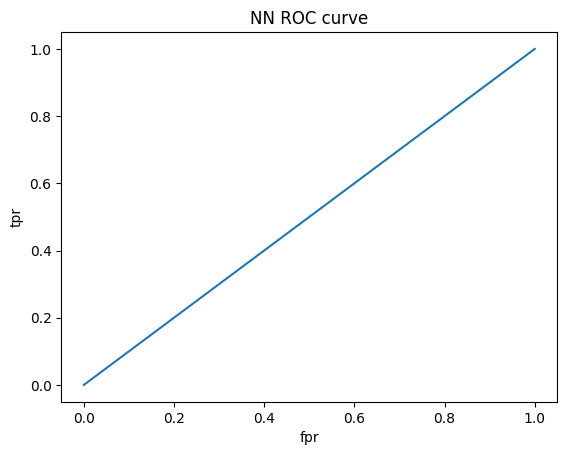

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_classes)


plt.plot()
plt.plot(fpr,tpr, label='NN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'NN ROC curve')
plt.show()

## Convolutional Neural Network

In [31]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy import signal
from keras.layers import Dropout, BatchNormalization

In [32]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass


In [33]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))    

In [34]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)

In [35]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.mean(output_gradient, axis=1, keepdims=True)
        return input_gradient

In [36]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

In [37]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [38]:
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input):
        return np.reshape(input, self.output_shape)

    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)

In [39]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs=1000, learning_rate=0.01, verbose=True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            x = x.reshape(-1, 1)  # Reshape input for the network
            y = y.reshape(-1, 1)  # Reshape target for the network

            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")

In [40]:
# Preprocess your data
def preprocess_data(X, y):
    # Convert X to a numpy array and normalize
    X = X.to_numpy().astype('float32')
    X = X / 26  # Normalize the input to be in the range [0, 1]

    # Convert y to a numpy array and one-hot encode
    y = y.to_numpy()
    y = to_categorical(y, 2).reshape(len(y), 2, 1)

    return X, y


In [72]:
x_train, y_train = preprocess_data(X_values, Y_values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [42]:


# Define the neural network architecture
network = [
    Dense(15, 100),  # Adjust the input size to 15 (the number of features)
    Sigmoid(),
    Dense(100, 50),
    Sigmoid(),
    Dense(50, 2),  # The output layer should have 2 neurons for binary classification
    Sigmoid()
]

# Train the network
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=50,
    learning_rate=0.01
)

1/50, error=0.6686221239830246
2/50, error=0.6613943938428568
3/50, error=0.6559631528008518
4/50, error=0.6495746701991478
5/50, error=0.6417909606607255
6/50, error=0.6335368500674452
7/50, error=0.625896364269134
8/50, error=0.6195751650462793
9/50, error=0.6140893355135442
10/50, error=0.6089000697138223
11/50, error=0.6036996371248119
12/50, error=0.5983693943963694
13/50, error=0.5929194051213096
14/50, error=0.5874204935206045
15/50, error=0.5819686956801539
16/50, error=0.5766805872973498
17/50, error=0.5716539646274031
18/50, error=0.5669224672294687
19/50, error=0.5625345844738082
20/50, error=0.5585457079589875
21/50, error=0.5549534439038505
22/50, error=0.551730312114436
23/50, error=0.5488191006948361
24/50, error=0.5461552313385717
25/50, error=0.543683073572392
26/50, error=0.5413623747201222
27/50, error=0.5391684662196342
28/50, error=0.5370859178437399
29/50, error=0.53510187509314
30/50, error=0.5332036379388603
31/50, error=0.5313790451940383
32/50, error=0.5296169

In [73]:
# Test the network and calculate accuracy
correct_predictions = 0
total_predictions = len(x_test)
y_pred = []
y_true = []

for x, y in zip(x_test, y_test):
    x = x.reshape(-1, 1)  # Reshape input for the network
    y = y.reshape(-1, 1)  # Reshape target for the network
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")
    predicted_label = np.argmax(output)
    true_label = np.argmax(y)
    y_pred.append(predicted_label)
    y_true.append(true_label)
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")

pred: 0, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 0, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 1
pred: 1, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true:

In [ ]:
y_pred = []


In [44]:
def string_to_ascii_padded(name):
    # Convert the name to uppercase
    name = name.upper()
    # Convert each character to its ASCII value (A=1, B=2, ..., Z=26)
    ascii_values = [(ord(c) - 64) for c in name if 'A' <= c <= 'Z']
    # Pad with zeros if length is less than 15
    while len(ascii_values) < 15:
        ascii_values.append(0)
    # Truncate if length is more than 15
    if len(ascii_values) > 15:
        ascii_values = ascii_values[:15]
    return ascii_values

In [45]:
def predict_gender_custom(name, custom_model):
    # Convert the name to its ASCII representation
    ascii_values = string_to_ascii_padded(name)
    # Convert to numpy array and reshape for the custom model
    input_data = np.array(ascii_values).reshape(15, 1)
    # Forward pass through the custom neural network
    output = input_data
    for layer in custom_model:
        output = layer.forward(output)
    # Convert the output to a class label
    predicted_class = np.argmax(output, axis=0)
    # Map the class label to gender
    gender = 'Male' if predicted_class[0] == 1 else 'Female'
    return gender


In [60]:
name_to_predict = ""
predicted_gender = predict_gender_custom(name_to_predict, network)
print(f"The predicted gender for the name '{name_to_predict}' is: {predicted_gender}")

The predicted gender for the name 'julio' is: Female


In [62]:
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay

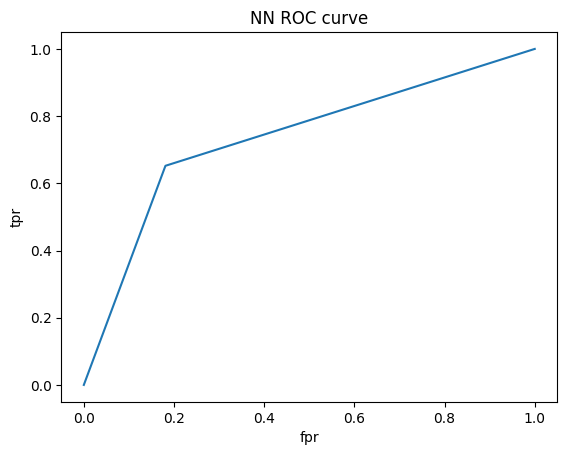

In [78]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)


plt.plot()
plt.plot(fpr,tpr, label='NN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'NN ROC curve')
plt.show()